<a href="https://colab.research.google.com/github/MohamedAbdelAzeem/Lane-Detection/blob/main/Lane_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
#from IPython.display import HTML, Video
from moviepy.editor import VideoFileClip


Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2220032/45929032 bytes (4.8%)4685824/45929032 bytes (10.2%)7241728/45929032 bytes (15.8%)9527296/45929032 bytes (20.7%)12410880/45929032 bytes (27.0%)15499264/45929032 bytes (33.7%)18227200/45929032 bytes (39.7%)20332544/45929032 bytes (44.3%)22241280/45929032 bytes (48.4%)24174592/45929032 bytes (52.6%)26763264/45929032 bytes (58.3%)30048256/45929032 bytes (65.4%)3

In [2]:
%cd  drive/MyDrive/A_ImageProcessingProject/

/content/drive/MyDrive/A_ImageProcessingProject


# Importing images

In [5]:
images = []
images.append(mpimg.imread('test_images/challenge_video_frame_1.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_100.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_110.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_120.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_130.jpg'))
images.append(mpimg.imread('test_images/challenge_video_frame_140.jpg'))

In [6]:
images1 = []
images1.append(mpimg.imread('test_images/project_video_frame_1032.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_1048.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_235.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_810.jpg'))
images1.append(mpimg.imread('test_images/project_video_frame_551.jpg'))

In [8]:
images2 = []
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_10.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_100.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_200.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_300.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_400.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_500.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_600.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_700.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_800.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_900.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1000.jpg'))
images2.append(mpimg.imread('test_images/harder_challenge_video_frame_1100.jpg'))

# Original Image

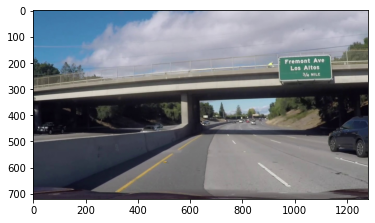

In [9]:
 plt.imshow(images[1])

# Converting to HLS domain 


In [12]:
def plot(img):
    # Converting to HLS
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    # creating figure box 
    f = plt.figure(figsize=(24, 9))
    
    ax0 = f.add_subplot(2, 3, 1)
    ax0.imshow(hls)
    ax0.title.set_text('HLS image ')

    ax1 = f.add_subplot(2, 3, 2)
    ax1.imshow(hls[:,:,0])
    ax1.title.set_text('H channel ')


    ax2 = f.add_subplot(2, 3, 3)
    ax2.imshow(hls[:,:,1])
    ax2.title.set_text('L channel ')

    ax3 = f.add_subplot(2, 3, 4)
    ax3.imshow(hls[:,:,2])
    ax3.title.set_text('S channel ')

    plt.figure()
    

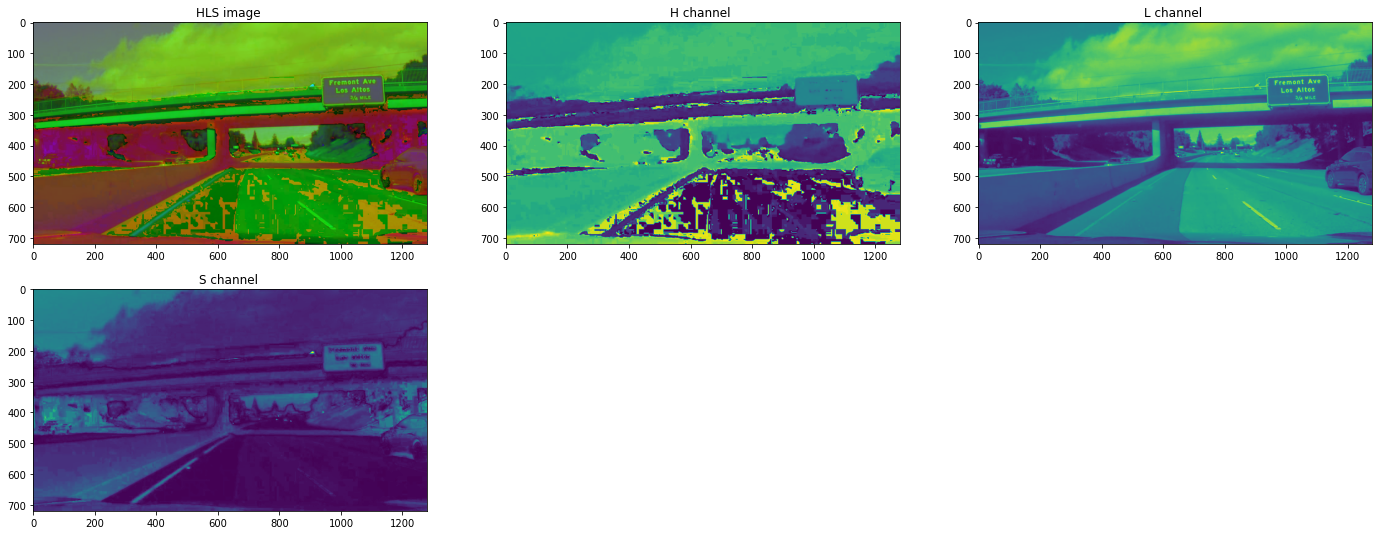

<Figure size 432x288 with 0 Axes>

In [13]:
plot(images[1])

#Thresholding 
In thresholding, each pixel value is compared with the threshold value.

In [40]:
def threshold_rel(img, lo, hi):
    vmin = np.min(img)
    vmax = np.max(img)
    
    vlo = vmin + (vmax - vmin) * lo
    vhi = vmin + (vmax - vmin) * hi
    return np.uint8((img >= vlo) & (img <= vhi)) * 255

def threshold_abs(img, lo, hi):
    return np.uint8((img >= lo) & (img <= hi)) * 255

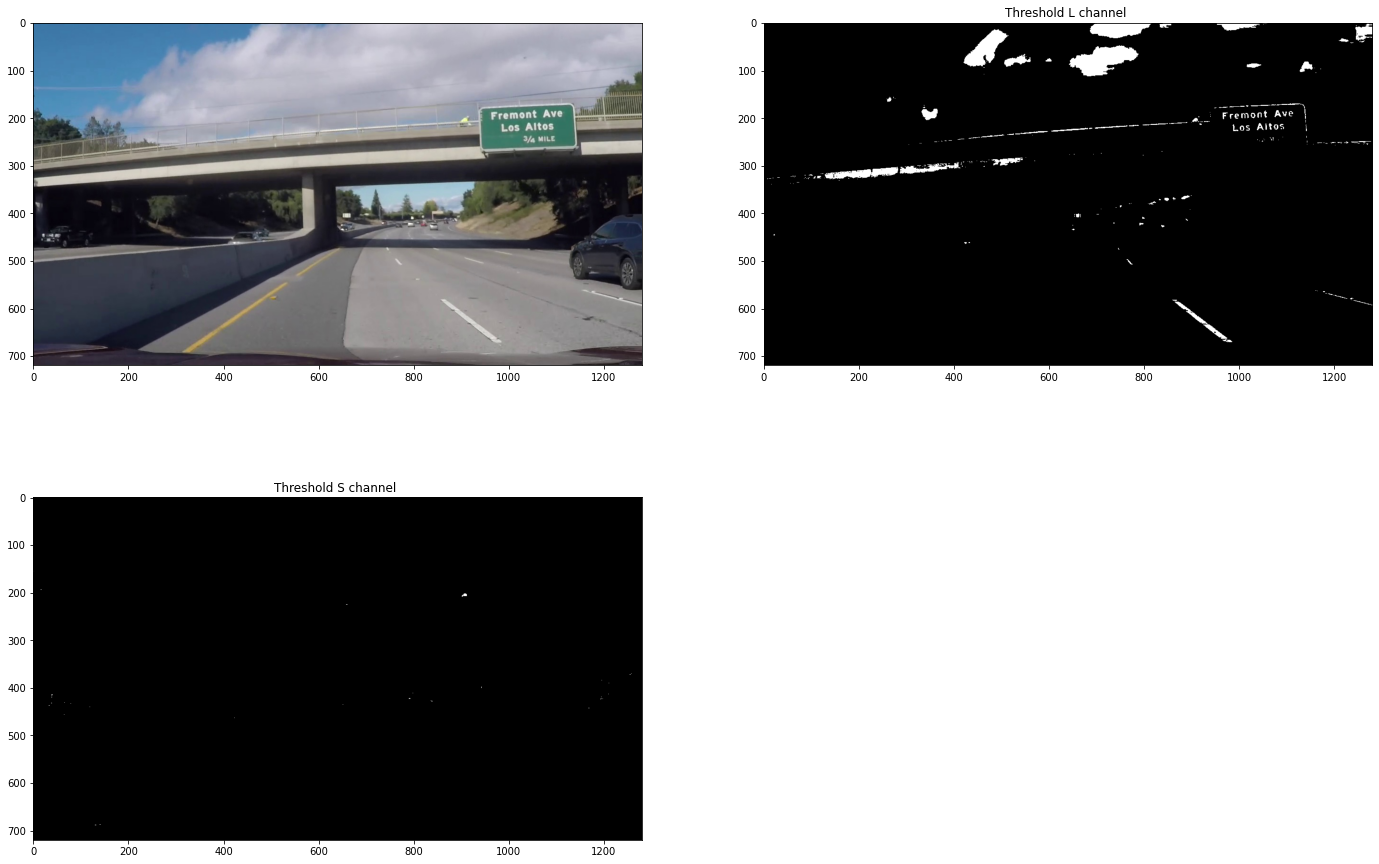

In [44]:
#original image
f = plt.figure(figsize=(24, 16))
ax1 = f.add_subplot(2, 2, 1)
ax1.imshow(images[1])

#convert to HLS
hls = cv2.cvtColor(images[1], cv2.COLOR_RGB2HLS)
h_channel = hls[:,:,0]
l_channel = hls[:,:,1]
s_channel = hls[:,:,2]


thresh_Lchannel =  threshold_rel(l_channel, 0.8, 1.0)
thresh_Lchannel2 =  threshold_rel(s_channel, 0.8, 1.0)


#show image 
ax2 = f.add_subplot(2, 2, 2)
ax2.imshow(thresh_Lchannel, vmin=0, vmax=255, cmap='gray')
ax2.title.set_text('Threshold L channel ')

#show image 
ax3 = f.add_subplot(2, 2, 3)
ax3.imshow(thresh_Lchannel2, vmin=0, vmax=255, cmap='gray')
ax3.title.set_text('Threshold S channel ')

